# Collaborative Filtering 
## Srivatsav Yallapragada's Notebook

In [2]:
#!pip install numpy==1.24.4

In [3]:
#!pip install scikit-surprise

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#print(np.__version__)

In [6]:
df_rating = pd.read_csv('book_reviews.csv')

In [7]:
df_rating.shape

(793, 3)

In [8]:
df_rating.head()

,userID,bookID,rating
0,1,1,5
1,1,2,5
2,1,3,2
3,1,4,3
4,1,5,5


In [9]:
userBook_matrix = df_rating.pivot(index='userID', columns='bookID', values='rating').fillna(0)
userBook_matrix

bookID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
userID,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,5.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,3.0,0.0,1.0,4.0
2,0.0,2.0,5.0,4.0,4.0,3.0,0.0,4.0,2.0,5.0,0.0,2.0,4.0,4.0,5.0,2.0,2.0,0.0,5.0,5.0
3,1.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0,5.0,3.0,3.0,3.0,2.0,3.0,2.0,5.0,1.0,4.0,0.0,5.0
4,5.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,1.0,1.0,4.0
5,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,0.0,4.0,3.0,5.0,3.0,0.0,1.0,5.0,0.0,4.0,3.0,0.0
6,4.0,0.0,2.0,0.0,1.0,2.0,4.0,1.0,1.0,4.0,3.0,1.0,3.0,0.0,1.0,3.0,0.0,4.0,1.0,5.0
7,2.0,3.0,1.0,4.0,5.0,3.0,1.0,3.0,5.0,3.0,5.0,4.0,1.0,5.0,4.0,1.0,4.0,0.0,0.0,0.0
8,1.0,0.0,5.0,4.0,0.0,5.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0
9,1.0,4.0,4.0,0.0,2.0,3.0,5.0,0.0,0.0,2.0,0.0,4.0,5.0,4.0,4.0,0.0,3.0,4.0,2.0,3.0


In [10]:
# Unique counts
num_users = df_rating['userID'].nunique()
num_books = df_rating['bookID'].nunique()

# Rating distribution
rating_counts = df_rating['rating'].value_counts().sort_index()

#print
print(f"Number of Unique Users: {num_users}")
print(f"Number of Unique Books: {num_books}\n")
print("Rating Distribution:")
print(rating_counts)


Number of Unique Users: 50
Number of Unique Books: 20

Rating Distribution:
rating
1    150
2    172
3    164
4    148
5    159
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_22972\3164724964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_rating, x='rating', palette='pastel')


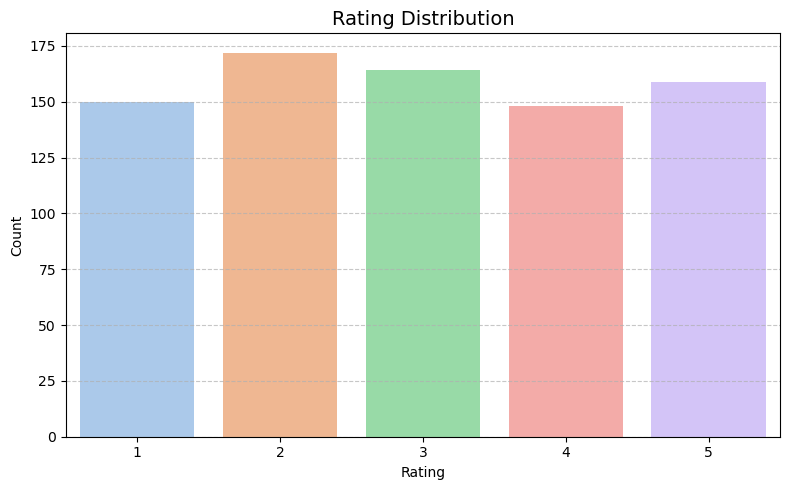

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_rating, x='rating', palette='pastel')
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Users use the full 1–5 rating scale pretty evenly. This balance helps collaborative filtering models learn both what users like and what they don’t like effectively.
### More 1–2 star ratings suggest that users might be more likely to leave ratings when they are unhappy. This feedback is key for improving models and content.

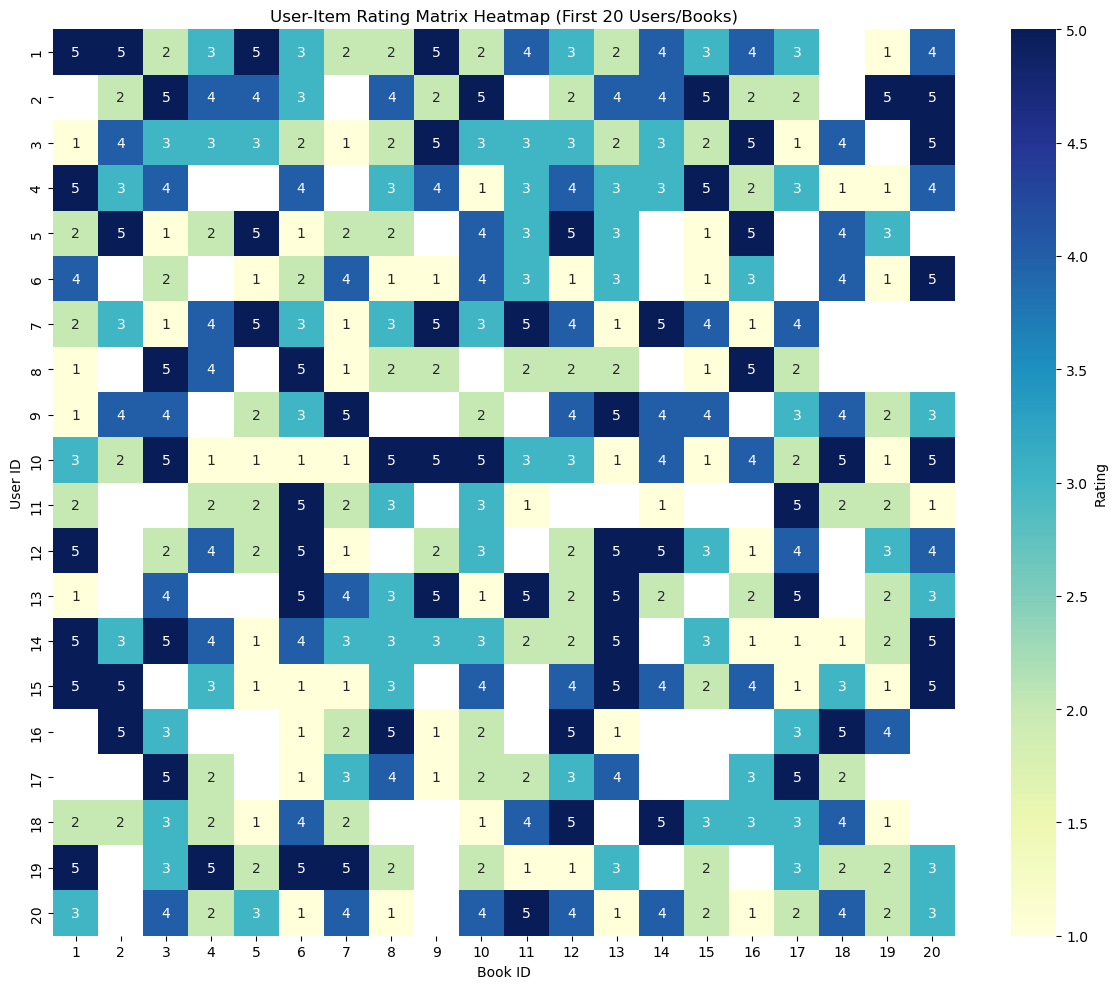

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(userBook_matrix.iloc[:20, :20], annot=True, cmap="YlGnBu",cbar_kws={'label': 'Rating'}, mask=(userBook_matrix.iloc[:20, :20] == 0))
plt.title('User-Item Rating Matrix Heatmap (First 20 Users/Books)')
plt.xlabel('Book ID')
plt.ylabel('User ID')
plt.tight_layout()
plt.savefig("user_item_heatmap.png", dpi=300)
plt.show()

### Insights from User-book Heatmap

#### The matrix shows strong interactions between users and books, with ratings from 1 to 5. This makes it suitable for collaborative filtering methods.
#### Some books regularly get **high ratings from users**, making them strong choices for popular recommendations based on items.


C:\Users\HP\AppData\Local\Temp\ipykernel_22972\2215836698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_rating, palette='viridis')


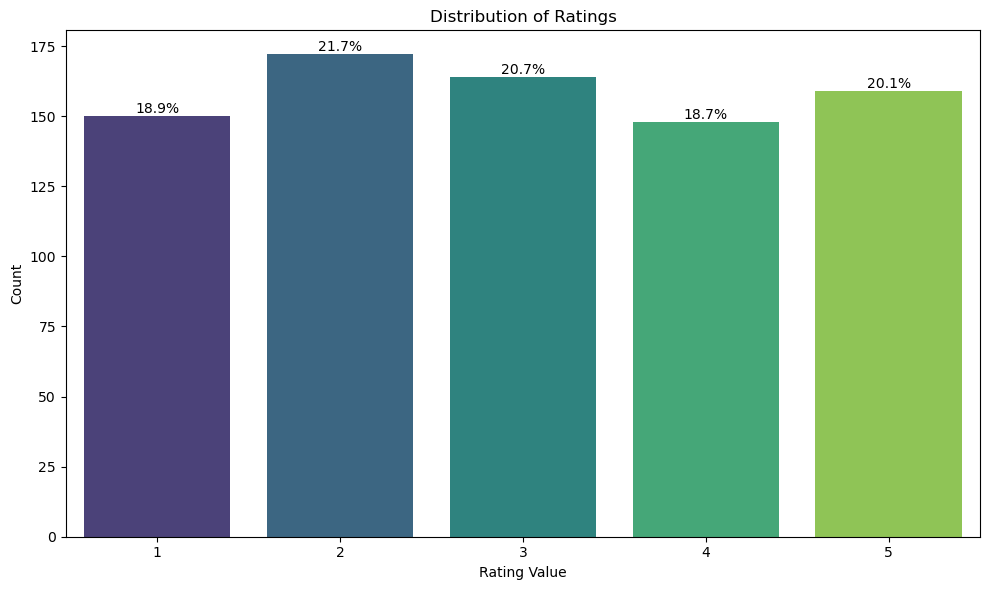

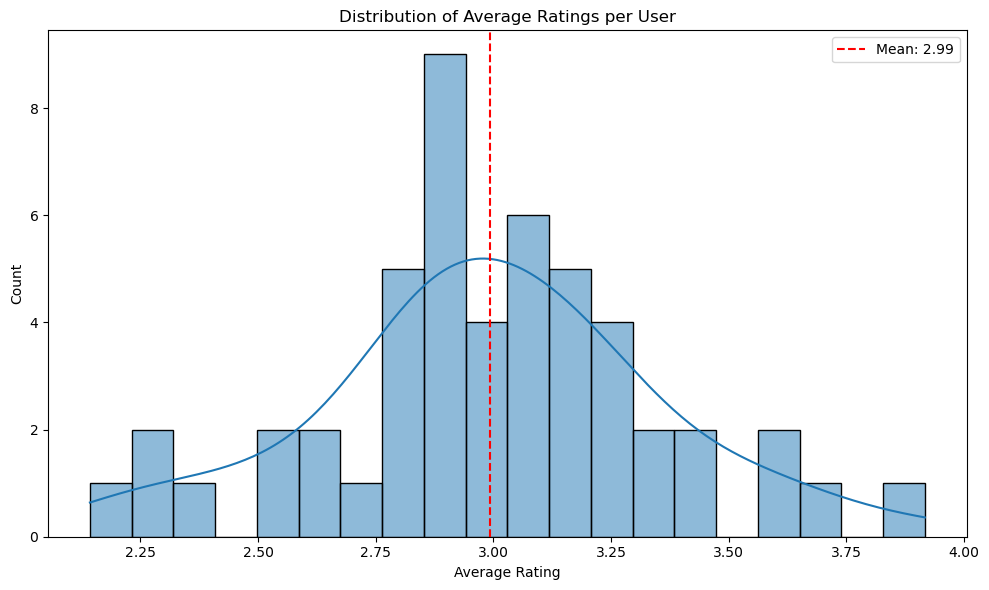

In [24]:
plt.figure(figsize=(10, 6))

# Plot the distribution of ratings
sns.countplot(x='rating', data=df_rating, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count')

# Add percentage labels on top of the bars
total = len(df_rating)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.tight_layout()
plt.savefig("Distribution of Ratings.png", dpi=300)
plt.show()

# Add a box plot to show rating distribution by user
plt.figure(figsize=(10, 6))
user_ratings = df_rating.groupby('userID')['rating'].mean().reset_index()
sns.histplot(user_ratings['rating'], kde=True, bins=20)
plt.axvline(user_ratings['rating'].mean(), color='r', linestyle='--',
           label=f'Mean: {user_ratings["rating"].mean():.2f}')
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig("Distribution of Average Ratings per User.png", dpi=300)
plt.show()

### Insights from Rating Distributions

#### Most users give a rating around 3, which shows that they tend to rate things neutrally or fairly.
#### The rating distribution shows that there are more 2-star ratings than other ratings. This means that users are often more critical, which helps the model better tell the difference between books that people like and dislike.


# Sparsity

In [28]:
total_possible_ratings = userBook_matrix.shape[0] * userBook_matrix.shape[1]
total_actual_ratings = df_rating.shape[0]
sparsity_percentage = 100 * (1 - (total_actual_ratings / total_possible_ratings))

print(f"Total Possible Ratings (Users × Books): {total_possible_ratings}")
print(f"Total Actual Ratings Given: {total_actual_ratings}")
print(f"Sparsity of the User-Item Matrix: {sparsity_percentage:.2f}%")

Total Possible Ratings (Users × Books): 1000
Total Actual Ratings Given: 793
Sparsity of the User-Item Matrix: 20.70%


### Insights from User-Item Matrix Sparsity

- #### With a sparsity of **20.7%**, the matrix tells many ratings are available, making it easier to find similar users or books; this provides a strong foundation for collaborative filtering models to learn meaningful user-book interactions.
- #### The high number of actual ratings (793 out of 1000) reduces the **cold start problem**, ensuring most users and books have sufficient data.


# User-Based Collaborative Filtering using Pearson Correlation.

In [32]:
from surprise import Reader, Dataset, KNNWithMeans

# Use the Surprise library's Reader class to parse the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rating[['userID', 'bookID', 'rating']], reader)

In [101]:
#split data
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.20, random_state=18)

In [103]:
#Train the model and make predictions
model_pearson = KNNWithMeans(k=10, sim_options={'name': 'pearson'})
model_pearson.fit(trainset)

# Use the trained model to make predictions on the test data
predictions_pearson = model_pearson.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [105]:
# Evaluate the model's performance using the RMSE metric
from surprise import accuracy
accuracy.rmse(predictions_pearson)

RMSE: 1.4382


1.438150166361491

### The RMSE value is 1.42, indicating that there is room for improvement with this model. Ideally, the RMSE should be maintained below 1 and closer to 0.5 to enhance accuracy. 
### This value suggests that the predicted ratings deviate from the actual ratings by approximately 1.42 points. We can consider switching to other models and checking their RMSE values.

In [139]:
# predictions
for pred in predictions_pearson[:5]:
    print(f"User: {pred.uid}, Book: {pred.iid}, True: {pred.r_ui}, Predicted: {pred.est:.2f}")

User: 5, Book: 1, True: 2.0, Predicted: 3.14
User: 5, Book: 13, True: 3.0, Predicted: 2.54
User: 7, Book: 8, True: 3.0, Predicted: 2.69
User: 47, Book: 1, True: 2.0, Predicted: 2.74
User: 38, Book: 7, True: 4.0, Predicted: 3.64


### When examining all the predictions, the deviation ranges from 0.3 to 1.2, which is below 1.42.
### For example, a true rating of 2.0 was predicted as 3.14, indicating moderate error.

# Cosine

In [111]:
#Train the model and make predictions
model_cosine = KNNWithMeans(k=10, sim_options={'name': 'cosine'})
model_cosine.fit(trainset)

# Use the trained model to make predictions on the test data
predictions_cosine = model_cosine.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [113]:
# Evaluate the model's performance using the RMSE metric
from surprise import accuracy
accuracy.rmse(predictions_cosine)

RMSE: 1.4172


1.417156806575112

In [115]:
# prediction
for pred in predictions_cosine[:5]:
    print(f"User: {pred.uid}, Book: {pred.iid}, True: {pred.r_ui}, Predicted: {pred.est:.2f}")

User: 5, Book: 1, True: 2.0, Predicted: 2.71
User: 5, Book: 13, True: 3.0, Predicted: 2.69
User: 7, Book: 8, True: 3.0, Predicted: 2.40
User: 47, Book: 1, True: 2.0, Predicted: 2.08
User: 38, Book: 7, True: 4.0, Predicted: 3.07


### User-Based Collaborative Filtering using Cosine Similarity (k=10)

### Model Performance
- #### **RMSE on test set:** `1.4172`
- #### This indicates that the predicted ratings deviate from the actual values by approximately 1.42 points on a scale of 1–5.
- #### While the performance slightly improves over Pearson (RMSE: 1.4382), it still leaves significant room for enhancement.
### Prediction
- #### Predicted ratings fall fairly close to actual values, with **deviations ranging from 0.3 to 1.2**.
- #### The model still **tends to underestimate high ratings** and overestimate low ones.


# SVD

In [117]:
from surprise import Reader, Dataset, SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
# Train the SVD model
algo = SVD()
algo.fit(trainset)

In [119]:
predictions_SVD = algo.test(testset)
accuracy.rmse(predictions_SVD)

RMSE: 1.3825


1.3825202867988904

In [147]:
# prediction
for pred in predictions_SVD[:5]:
    print(f"User: {pred.uid}, Book: {pred.iid}, True: {pred.r_ui}, Predicted: {pred.est:.2f}")

User: 5, Book: 1, True: 2.0, Predicted: 3.00
User: 5, Book: 13, True: 3.0, Predicted: 3.21
User: 7, Book: 8, True: 3.0, Predicted: 3.02
User: 47, Book: 1, True: 2.0, Predicted: 3.20
User: 38, Book: 7, True: 4.0, Predicted: 3.41


### Matrix Factorization using SVD (Singular Value Decomposition)
- #### The model was trained on 80% of the dataset and evaluated on a 20% test split using the default `SVD()` implementation from the Surprise library.

### Model Performance
- #### **RMSE on test set:** `1.3825`
- #### This is the **lowest RMSE** among the three methods tried (Pearson: 1.4382, Cosine: 1.4172), indicating that SVD is more accurate in capturing user preferences and item characteristics.

- #### Predictions are **closer to the true ratings** and more consistent.




# Comparisions

RMSE: 1.4382
RMSE: 1.4172
RMSE: 1.3825


C:\Users\HP\AppData\Local\Temp\ipykernel_22972\3050652384.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_df, x='Model', y='RMSE', palette='pastel')


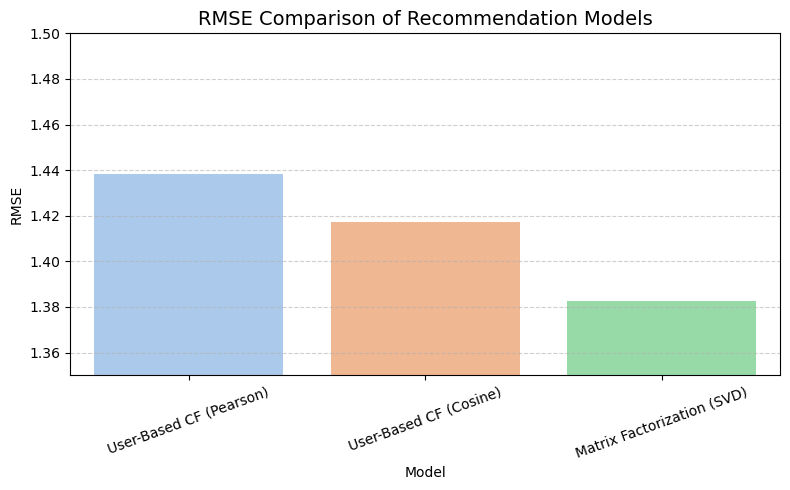

In [125]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manually re-enter RMSE values (placeholders; replace with actual ones from Surprise results)
rmse_pearson = accuracy.rmse(predictions_pearson)
rmse_cosine = accuracy.rmse(predictions_cosine)
rmse_svd = accuracy.rmse(predictions_SVD)

# Create comparison dataframe
rmse_df = pd.DataFrame({
    'Model': ['User-Based CF (Pearson)', 'User-Based CF (Cosine)', 'Matrix Factorization (SVD)'],
    'RMSE': [rmse_pearson, rmse_cosine, rmse_svd]
})

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=rmse_df, x='Model', y='RMSE', palette='pastel')
plt.title("RMSE Comparison of Recommendation Models", fontsize=14)
plt.ylabel("RMSE")
plt.xticks(rotation=20)
plt.ylim([1.35, 1.5])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Summary of Recommendation Model Comparison

#### 1. **SVD outperforms User-Based models** with the lowest RMSE (1.3825), with its ability to capture hidden user-item relationships in sparse datasets.

#### 2. **Cosine similarity yields better performance than Pearson** in user-based collaborative filtering, suggesting that directional similarity better represents user behavior.


### Business Insights from Recommendation Model Comparison

1. **SVD (Singular Value Decomposition) delivers the most accurate recommendations**, with the lowest RMSE among the three models. It works by learning hidden patterns in user behavior, even when data is sparse. This makes it ideal for online bookstores or e-commerce platforms, where users may only rate a few items. More accurate recommendations mean customers are more likely to engage with the platform, explore more titles, and complete purchases — ultimately boosting revenue.

2. **Cosine similarity outperforms Pearson in user-based collaborative filtering**, showing that comparing the direction of user preferences (rather than their exact rating differences) is more effective. This approach helps cluster customers with similar reading preferences, which businesses can use to launch targeted promotions, such as "readers like you also bought..." banners, personalized emails, or curated book bundles.

3. **KNN models (Pearson and Cosine) are transparent and interpretable**, making them valuable in scenarios where explainability is important. For example, when a customer asks, “Why was this book recommended?”, a business can say, “Because users similar to you enjoyed it.” This interpretability builds trust and is especially useful in customer-facing applications or in industries that require auditability.

4. While **SVD is best suited for long-term personalization strategies due to its high accuracy**, **KNN-based models are easier to update and adapt in real-time**, such as when new users or books are added. A hybrid approach can be highly effective — SVD handles deeper personalization, while KNN models serve as a lightweight fallback during cold-start conditions or when quick, explainable recommendations are needed.



# Implement Clustering-Based Approach

In [89]:
userBook_matrix

bookID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
userID,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,2.0,3.0,5.0,3.0,2.0,2.0,5.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,3.0,0.0,1.0,4.0
2,0.0,2.0,5.0,4.0,4.0,3.0,0.0,4.0,2.0,5.0,0.0,2.0,4.0,4.0,5.0,2.0,2.0,0.0,5.0,5.0
3,1.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0,5.0,3.0,3.0,3.0,2.0,3.0,2.0,5.0,1.0,4.0,0.0,5.0
4,5.0,3.0,4.0,0.0,0.0,4.0,0.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,1.0,1.0,4.0
5,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,0.0,4.0,3.0,5.0,3.0,0.0,1.0,5.0,0.0,4.0,3.0,0.0
6,4.0,0.0,2.0,0.0,1.0,2.0,4.0,1.0,1.0,4.0,3.0,1.0,3.0,0.0,1.0,3.0,0.0,4.0,1.0,5.0
7,2.0,3.0,1.0,4.0,5.0,3.0,1.0,3.0,5.0,3.0,5.0,4.0,1.0,5.0,4.0,1.0,4.0,0.0,0.0,0.0
8,1.0,0.0,5.0,4.0,0.0,5.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0
9,1.0,4.0,4.0,0.0,2.0,3.0,5.0,0.0,0.0,2.0,0.0,4.0,5.0,4.0,4.0,0.0,3.0,4.0,2.0,3.0


In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the matrix
scaler = StandardScaler()
userBook_scaled = scaler.fit_transform(userBook_matrix)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
user_clusters = kmeans.fit_predict(userBook_scaled)

# Add cluster labels to user_matrix
userBook_matrix['Cluster'] = user_clusters


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [190]:
target_users = [1,4,8,16]

for target_user in target_users:
    user_cluster = userBook_matrix.loc[target_user, 'Cluster']

    # Books rated by user
    books_rated_by_user = df_rating[df_rating['userID'] == target_user]['bookID'].tolist()
    print(f"Books rated by the User {target_user}:")
    print(books_rated_by_user)
    print('\n')

    # Other users in cluster
    cluster_users = userBook_matrix[userBook_matrix['Cluster'] == user_cluster].drop('Cluster', axis=1)

    # Mean ratings across cluster
    mean_ratings_cluster = cluster_users.mean().sort_values(ascending=False)
    #print(mean_ratings_cluster)

    # Relaxed filtering: drop books only if already rated with high rating
    relaxed_recommendations = mean_ratings_cluster[~mean_ratings_cluster.index.isin(books_rated_by_user)].head(5)

    # Fallback if still empty
    if relaxed_recommendations.empty:
        relaxed_recommendations = mean_ratings_cluster.head(5)

    print(f"Top recommendations for User {target_user} (Cluster {user_cluster}):")
    print(relaxed_recommendations)
    print("-"*100)


Books rated by the User 1:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]


Top recommendations for User 1 (Cluster 2):
bookID
18    2.833333
dtype: float64
----------------------------------------------------------------------------------------------------
Books rated by the User 4:
[1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Top recommendations for User 4 (Cluster 2):
bookID
4    2.611111
5    2.555556
7    1.277778
dtype: float64
----------------------------------------------------------------------------------------------------
Books rated by the User 8:
[1, 3, 4, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17]


Top recommendations for User 8 (Cluster 0):
bookID
20    2.684211
10    2.526316
18    2.210526
5     2.000000
19    1.789474
dtype: float64
----------------------------------------------------------------------------------------------------
Books rated by the User 16:
[2, 3, 6, 7, 8, 9, 10, 12, 13, 17, 18, 19]


Top recommendations for User 1

### Implementation of Cluster-Based Book Recommendations

- #### Standardized the user-book rating matrix to prepare for clustering.
- #### Applied **KMeans clustering** to group users based on their rating patterns.
- #### For each selected user, identified their cluster and retrieved **top-rated books** within that cluster.
- #### Filtered out books the user had already rated to generate **personalized recommendations**.
- #### Ensured fallback recommendations from cluster favorites when no new suggestions were available.


### Cluster-Based Recommendation Insights

#### 1. Users receive different recommendations based on their cluster, showing that the system personalizes suggestions not just individually, but by identifying groups of users with similar taste (collaborative behavior).

#### 2. **User 1 and User 4 belong to the same cluster (Cluster 2)**, but they receive different recommendations because:
    - They’ve already rated most of the popular books in that cluster.
    - The recommendations are adjusted based on what’s left unrated — showing the system adapts per user even within the same group.

#### 3. **User 8 (Cluster 0) received more diverse and higher average recommendations**, indicating that:
    - Their cluster likely contains more unique ratings.
    - Or, they’ve rated fewer total books, leaving more room for recommendations.

#### 4. **Recommendation fallback works properly** — when there are no unrated books left, the system still suggests the highest-rated books in the cluster. This ensures the system is never empty and always recommends something relevant.

